# STUDENT NAME:

# Point Patterns Analysis for photography locations in Japan

When points are seen as events that could take place in several locations but only happen in a few of them, a collection of such events is called a point pattern. In this case, the location of points is one of the key aspects of interest for analysis. 

A good example of a point pattern is geo-tagged photographs: they could technically happen in many locations but we usually find photos tend to concentrate only in a handful of them.

Point patterns deal with description, statistical characterization and modeling of the spatial patterns and 
also trying to understand what causes them.

This manusscript of a notebook will look at the point-patterns through geo-tagged photos from Tokyo, Japan.

The aim here is to manipulate the data to answer questions about the dispersion, clustering and the
center of distribution of the attractions in Tokyo for the photographers.



Simply put, how can we get areas to visit and photograph in Tokyo as aspiring photographers, by just analyzing this dataset.

The analysis starts by importing some libraries that will be used.

In [49]:
import folium
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster



import numpy
import pandas
import geopandas
import pysal
import seaborn
import contextily
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

Open the dataset from file storage

In [5]:
db = pandas.read_csv('tokyo_data.csv')

In [6]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   user_id               10000 non-null  object 
 1   longitude             10000 non-null  float64
 2   latitude              10000 non-null  float64
 3   date_taken            10000 non-null  object 
 4   photo/video_page_url  10000 non-null  object 
 5   x                     10000 non-null  float64
 6   y                     10000 non-null  float64
dtypes: float64(4), object(3)
memory usage: 547.0+ KB


The code below plots the data using the x and y columns converted to
longitude and latitude using Seaborn.

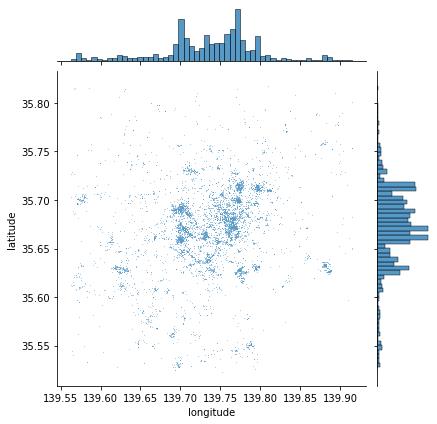

In [7]:
# Generate scatter plot
seaborn.jointplot(x='longitude', y='latitude', data=db, s=0.5);

The plot shows that there are more points concentrated at the center of the map.
There also seems to be more localised clusters in the map.

The map was then be plotted using Contextily and the Folium library, first by getting the x and y variables, and the using the Joint plot from seaborn library.
It just like a common scatter plot, but using the coordinates as the variables.

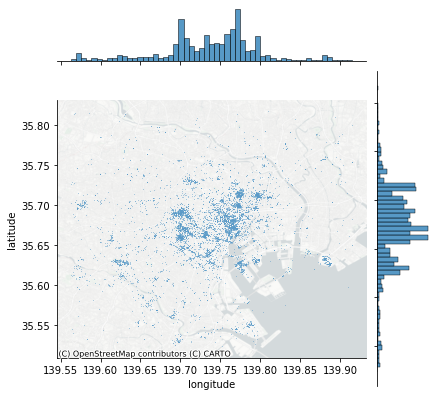

In [31]:

# Generate scatter plot
joint_axes = seaborn.jointplot(
    x='longitude', y='latitude', data=db, s=0.5
)
## AND then plot the basemap using Contextily
contextily.add_basemap(
    joint_axes.ax_joint,
    crs="EPSG:4326",
    source=contextily.providers.CartoDB.PositronNoLabels
);

When too many of the photos are concentrated in some of the areas, it can be hard 
to get the patterns. 
Therefore, the approach would be to generate a grid that represents the data as a choropleth map.

This is known as hex-binning, and in the cell below, a hexbin function has been applied on the dataset.

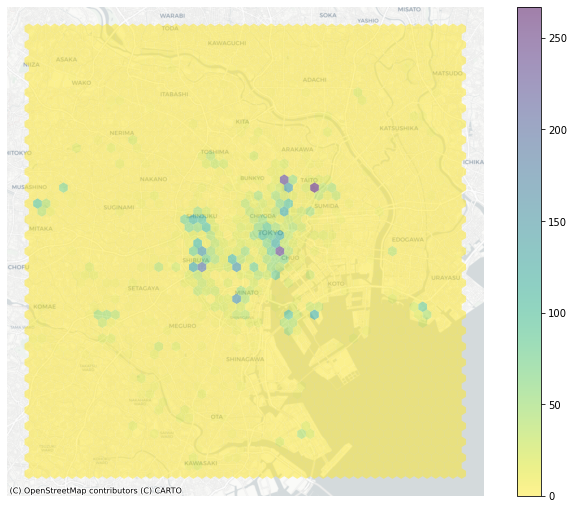

In [33]:
# Set up figure and axis

fig, ax = plt.subplots(1, figsize=(12, 9))

# Create and add hexbin with 50 hexagons in each dimension

hb = ax.hexbin(
    db['x'], 
    db['y'],
    gridsize=50, 
    linewidths=0,
    alpha=0.5, 
    cmap='viridis_r'
)
# Add basemap
contextily.add_basemap(
    ax, 
    source=contextily.providers.CartoDB.Positron
)
# Add colorbar
plt.colorbar(hb)
# Remove axes
ax.set_axis_off()

## Kernel Density Estimation: KDE

Using the Folium HeatMap plugin, the heat map of the photographers was plotted in the heart of Tokyo as shown in the figure below.

In [55]:
map_4 = folium.Map(location=[35.730372, 139.853442], tiles='cartodbpositron', zoom_start=12)
HeatMap(data=db[['latitude', 'longitude']], radius=8).add_to(map_4)

map_4

Also known as heat maps, they can be used to generate the surface using a kernel function.
The most common one being the Gaussian function, and then it uses the function to generate a plot, as shown in the cell  below.

First the figure and the axes are set up, then the KDE plot is generated using the Seaborn library and a 
basemap added to give some context to the result.

/home/adwar/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


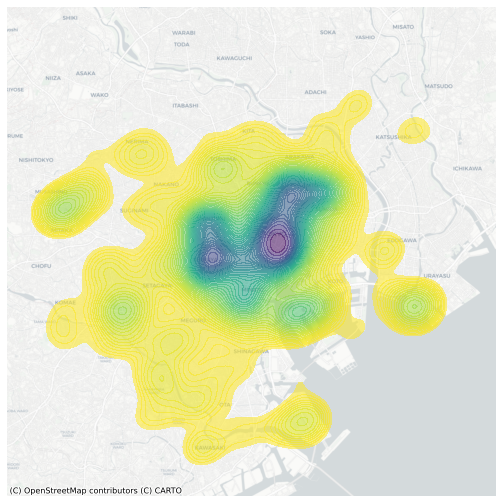

In [34]:
# Set up figure and axis
f, ax = plt.subplots(1, figsize=(9, 9))
# Generate and add KDE with a shading of 50 gradients 
# coloured contours, 75% of transparency,
# and the reverse viridis colormap
seaborn.kdeplot(
    db['x'], 
    db['y'],
    n_levels=50, 
    shade=True,
    alpha=0.55, 
    cmap='viridis_r'
)
# Add basemap
contextily.add_basemap(
    ax, 
    source=contextily.providers.CartoDB.Positron
)
# Remove axes
ax.set_axis_off()

# Central Tendency

To analyze the centrality of the photography dataset, the point patters 
were analysed for the center of mass, which identifies the central point clode to observations 
that have higher values.

The photography dataset is used to analyze the center of masss using the pointpats library.

In [35]:
from pointpats import centrography

The code below computes the median and the center of mass using the centrography module.

In [36]:
mean_center = centrography.mean_center(db[['x', 'y']])
med_center = centrography.euclidean_median(db[['x', 'y']])

A scatter plot of the centrography is then produced and a base map added as shown below.

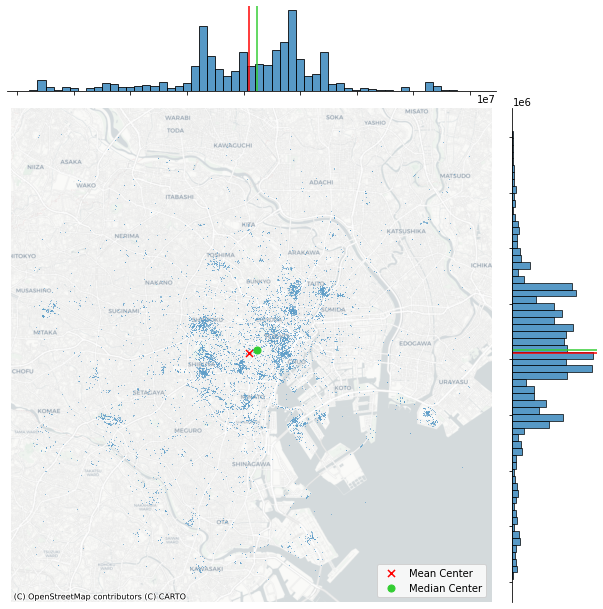

In [37]:
# Initialize a scatter plot
joint_axes = seaborn.jointplot(x='x', y='y', data=db, s=0.75, height=9)


# add the lines onto the plot
joint_axes.ax_joint.scatter(*mean_center, color='red', marker='x', s=50, label='Mean Center')

joint_axes.ax_marg_x.axvline(mean_center[0], color='red')
joint_axes.ax_marg_y.axhline(mean_center[1], color='red')
# Add median point and marginal lines
joint_axes.ax_joint.scatter(*med_center, color='limegreen', marker='o', s=50, label='Median Center')


joint_axes.ax_marg_x.axvline(med_center[0], color='limegreen')
joint_axes.ax_marg_y.axhline(med_center[1], color='limegreen')

# create a  Legend
joint_axes.ax_joint.legend()

# Add basemap using contextily
contextily.add_basemap(joint_axes.ax_joint, source=contextily.providers.CartoDB.Positron)

# Clean axes
joint_axes.ax_joint.set_axis_off()
# Display
plt.show()

From the plot, there are many clusters of the pictures in the West and the South of Tokyo.
The North and the East are densely packed on the other hand.

### Identifying cluster locations

Given that from the analysis above, it is known that there is some degree of overall clustering in the map, the 
its also important to know the exact areas where these clusters occur.

Spatial point clustering can be exploited using many methods, notable one being the Density-Based Spatial Clustering of Applications

DBSCAN has machine learing roots, and it looks at the concentration of a K number
of points within a distance D in the cluster.

Both the K and the D have to be specified before the algorithm is run.

Since the DBSCAN algorithm had already been imported, the next step is to initialize the algorithm.

The x and y data is then fitted using the DBSCAN, as shown in the cell below.

In [42]:
# Define DBSCAN
clusterer = DBSCAN()
# Fit to our data
clusterer.fit(db[["x", "y"]])

DBSCAN()

The cores, shows the points incide the cluster with atleast a certain number of points in the cluster within a certain distance.

In [43]:
# Print the first 5 elements of `cs`
clusterer.core_sample_indices_[:5]

array([ 1, 22, 30, 36, 42])

The labels object always has the same length as the number of points used to run DBSCAN. Each value represents the index of the cluster a point belongs to.

In [44]:
lbls = pandas.Series(clusterer.labels_, index=db.index)

The clusters can the be visualised, this has been done by first coloring the 
points in the cluster as red, and then those outside the cluster or noise, are colored as grey.

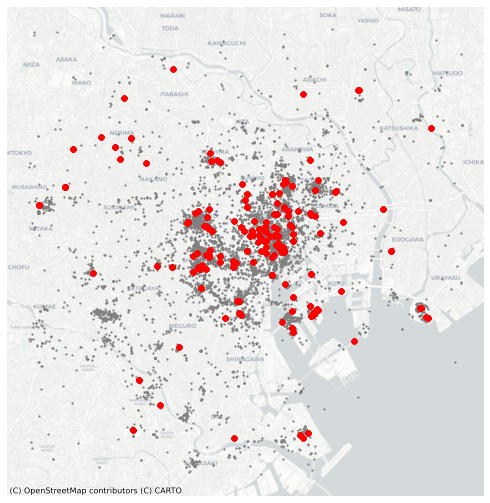

In [45]:
# Setup figure and axis
f, ax = plt.subplots(1, figsize=(9, 9))
# Subset points that are not part of any cluster (noise)
noise = db.loc[lbls==-1, ['x', 'y']]

# Plot noise in grey
ax.scatter(noise['x'], noise['y'], c='grey', s=5, linewidth=0)
# Plot all points that are not noise in red, this is done through some fancy indexing


ax.scatter(db.loc[db.index.difference(noise.index), 'x'], \
           db.loc[db.index.difference(noise.index), 'y'], \
          c='red', linewidth=0)
# Add the basemap
contextily.add_basemap(
    ax, 
    source=contextily.providers.CartoDB.Positron
)
# Remove axes
ax.set_axis_off()
# Display the figure
plt.show()

In conclusion, this manusrcipt of a notebook has looked at how points can be handled.


First, different techniques such as KDE and hex-bining can be used, also a library
known as Dask can be used for such visualization.

Then, the points were charactirised using the measures of tendency, and finally a machine
learning algorithm (unsupervised) known as DBSCAN was used to identify the cluster locations.

Those locations are where an unbeknownst photographer can go and take some quality pictures in Tokyo.